# Gradient Descent in 3D space

In [6]:
import matplotlib.pyplot as plt
import dataset
import numpy as np

In [7]:
#从数据中获取随机豆豆
SAMPLE_SIZE = 100
xs,ys = dataset.get_beans(SAMPLE_SIZE)

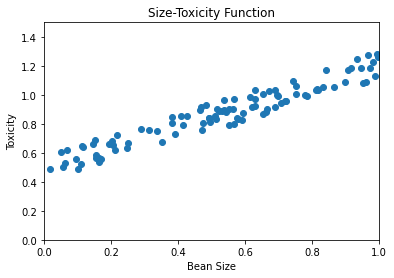

In [8]:
#配置图像
plt.title("Size-Toxicity Function", fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.xlim(0, 1)
plt.ylim(0, 1.5)

# 豆豆毒性散点图
plt.scatter(xs, ys)
plt.show()

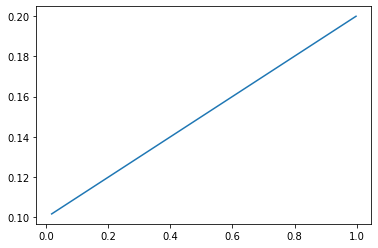

In [9]:
#预测函数
w=0.1
b=0.1
y_pre = w*xs+b

plt.plot(xs, y_pre)
plt.show()

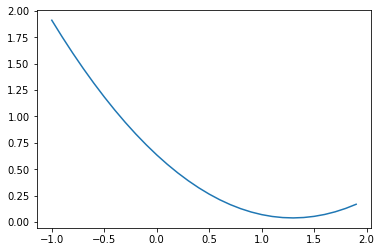

In [10]:
# 画一条当b = 0.1的曲线
ws = np.arange(-1, 2, 0.1)

es = []
for w in ws:
    y_pre = w * xs + b
    e = (1/SAMPLE_SIZE) * np.sum((ys - y_pre)**2) # SAMPLE_SIZE is the number of samples, already defined before
    es.append(e)

plt.plot(ws, es)    # 此处的图像是当b = 0.1的曲线
plt.show()

Cost function (for prediction function in the form of y = wx + b) is

$error = \frac{1}{m} \sum\limits_{i=0}^{m} (y_i - y_{pre})^2 = \frac{1}{m} \sum\limits_{i=0}^{m} (y_i - (x_i w +b))^2$

$error = \frac{1}{m} \sum\limits_{i=0}^{m} (b^2 + (2 x_i w - 2 y_i)b + (x_i^2 w^2 + y_i^2 - 2 x_i y_i w))$

/var/folders/tg/h677t1kx5zxd5srj2vt8fzw80000gn/T/ipykernel_29351/2966648276.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


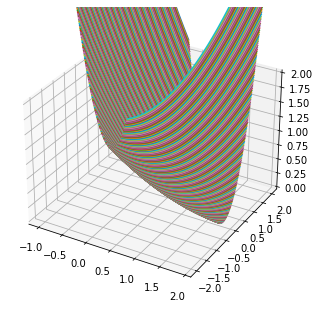

In [11]:
# 现在来画 b 和 w 都变的 cost function 的 3D 图像 (a series of parabolic curve, form a surface)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(0, 2)   # Set z axis range limitation to get a more prominent curvature


ws = np.arange(-1, 2, 0.1)
bs = np.arange(-2, 2, 0.01)

for b in bs:
    es = []
    for w in ws:
        y_pre = w * xs + b
        e = (1/SAMPLE_SIZE) * np.sum((ys - y_pre)**2)  # SAMPLE_SIZE is the number of samples, already defined before
        es.append(e)

    ax.plot(ws, es, b, zdir='y')    # 设置z轴垂直朝上，绘制一条w变化而b不变的曲线
    
# Get multiple curves with different w and b
plt.show()

# Random Gradient Descent Algorithm

Since the cost function is in the form of:

$error = \frac{1}{m} \sum\limits_{i=0}^{m} (b^2 + (2 x_i w - 2 y_i)b + (x_i^2 w^2 + y_i^2 - 2 x_i y_i w))$

$e'(w) = 2 x^2 w + 2 x b - 2 x y$

$e'(b) = 2 b + 2 x w - 2 y$

Then use calculated dw and db to update w and b value, one can get the dynamic gradient descent process

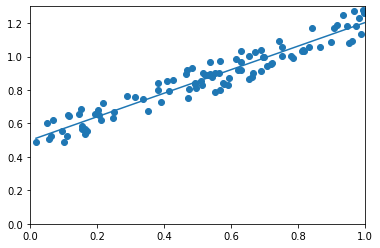

In [12]:
# Plot a dynamic plot
from IPython import display

alpha = 0.01   # step factor
# repeat 500 times training process
for m in range(500):
    for i in range(SAMPLE_SIZE):
        x = xs[i]
        y = ys[i]
        """
        Since cost function e = (y - (w*x + b))^2   -> 此处的y和x是dataset上的某一个单独的点
        针对w来说：
        e = 2xw + x2w2 
        e = b^2 + (2*x*w - 2*y)*b + (x^2*w^2 + y^2 - 2*x*y*w)
        """
        dw = 2 * x**2 * w + 2*x*b - 2*x*y    # 对 w 求导
        db = 2*b + 2*x*w - 2*y               # 对 b 求导
        w = w - alpha * dw                   # update w 值 according to current gradient
        b = b - alpha * db                   # update b 值 according to current gradient
        
    # plot a dynamic fitting curve
    plt.clf()
    plt.scatter(xs,ys)

    # 前向传播, 更新z 和 a
    y_pre = w * xs + b
    
    plt.xlim(0, 1)
    plt.ylim(0, 1.3)
    plt.plot(xs, y_pre)
    display.clear_output(wait=True)
    plt.pause(0.01)

# Training process
正向传播：通过输入数据到预测函数中得到结果的过程

反向传播：通过得到的结果对预测函数进行修正的过程